In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
#import cv2

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import cv2

In [3]:
#zip file contained by google website
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

flower_photos floder me store hoga,cache_dir matalab kaha store hoge .ka matlab same directory,untar matlab unzipe

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib

In [6]:
data_dir=pathlib.Path(data_dir)
data_dir
#now path is windows object

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))
#give me all files which have jpg file

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
#if you want to get roses
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

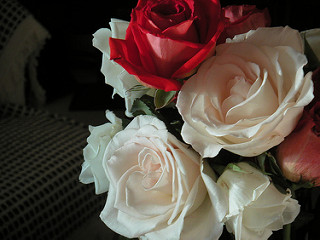

In [10]:
PIL.Image.open(str(roses[1]))

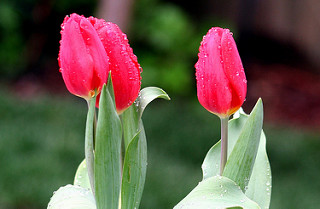

In [11]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
#dictionary like map changeble,unordered
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [14]:
#labels dictionary
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [15]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [16]:
img=cv2.imread(flowers_images_dict)

TypeError: Can't convert object of type 'dict' to 'str' for 'filename'

In [19]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
#converts image in an 3d np array type
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [21]:
img.shape

(240, 179, 3)

In [22]:
#3 for rgb,240*179 pixel size
#image dimensions are not same so we have to fix it to particular size
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [23]:
#Iterate through all key, value pairs: .values for only iterating through valus

for flower_name,images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [25]:
#X is for x train it is obtained by resized np array obtained by resize  and test ,y label is  obtained by which iflower imag it is
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
y[:5]
#first few images are flower

[0, 0, 0, 0, 0]

In [27]:
y[641]
#daisy

1

In [28]:
X[0] #3d array

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [29]:
X=np.array(X)
y=np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [31]:
y_test.shape

(918,)

In [32]:
y_train.shape

(2752,)

In [33]:
y.shape

(3670,)

In [34]:
#scalling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [35]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [44]:
num_classes=5
#pading=same input is same as  convolution output
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #output will be multidimensional we will flatten the array
    layers.Flatten(),
    #hidden layer
    layers.Dense(128,activation='relu'),
    #OUTPUT LAYER
    layers.Dense(num_classes)#default activation function is linerar
    
])
#we havev 16 fileters of size 3*3


In [46]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 58s 680ms/step - loss: 1.3274 - accuracy: 0.4368
Epoch 2/30
86/86 [==============================] - 58s 676ms/step - loss: 0.9877 - accuracy: 0.6108
Epoch 3/30
86/86 [==============================] - 58s 672ms/step - loss: 0.8270 - accuracy: 0.6915
Epoch 4/30
86/86 [==============================] - 58s 669ms/step - loss: 0.6354 - accuracy: 0.7642
Epoch 5/30
86/86 [==============================] - 58s 669ms/step - loss: 0.4401 - accuracy: 0.8445
Epoch 6/30
86/86 [==============================] - 58s 671ms/step - loss: 0.2680 - accuracy: 0.9052
Epoch 7/30
86/86 [==============================] - 58s 673ms/step - loss: 0.1554 - accuracy: 0.9491
Epoch 8/30
86/86 [==============================] - 58s 670ms/step - loss: 0.0868 - accuracy: 0.9764
Epoch 9/30
86/86 [==============================] - 58s 674ms/step - loss: 0.0703 - accuracy: 0.9833
Epoch 10/30
86/86 [==============================] - 58s 677ms/step - loss: 0.0355 - accura

In [51]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 211ms/step - loss: 2.2522 - accuracy: 0.6634


[2.252181053161621, 0.6633986830711365]

Here we see that while train accuracy is very high (99.93%), the test accuracy is significantly low (66.33%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [52]:
predictions=model.predict(X_test_scaled)
predictions

array([[  4.840006  ,  20.401314  ,  -6.052551  , -18.547216  ,
         -7.683979  ],
       [  5.4682183 ,  -0.990272  , -11.37186   ,  -3.2214868 ,
         -0.5691281 ],
       [ -8.172232  ,  -4.7918887 ,   8.951227  , -15.462559  ,
         -8.482837  ],
       ...,
       [  0.29369733,  -7.2895117 ,  -6.08546   ,   3.3919964 ,
          2.7321167 ],
       [ -0.3988965 ,   5.8818793 ,  -4.8122954 ,   0.8447032 ,
          2.327639  ],
       [  1.9358726 , -16.512928  ,  -1.8973598 ,   4.1941004 ,
          2.7722514 ]], dtype=float32)

In [53]:
# we use linear function which just gives what the ouput is

In [57]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7450577e-07, 9.9999988e-01, 3.2451316e-12, 1.2158146e-17,
       6.3491015e-13], dtype=float32)>

In [55]:
np.argmax(score)
#gives index of max number

1

In [56]:
y_test[0]

1

#using augmentation to overcome overfitting

In [36]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

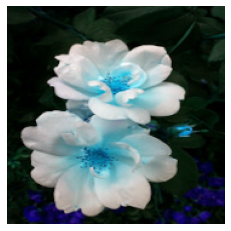

In [37]:
plt.axis('off')
#it does not show weird x and y axis
plt.imshow(X[0])

In [38]:
data_augmentation(X[0])
#it expects a 4d array so we have to call it for whole vector
#4D tensor with shape: (samples, height, width, channels),

InvalidArgumentError: Input images must have rank 4 [Op:ImageProjectiveTransformV2]

In [39]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[17, 31, 19],
        [15, 31, 17],
        [15, 29, 17],
        ...,
        [12, 34, 20],
        [12, 31, 19],
        [13, 30, 21]],

       [[14, 28, 16],
        [13, 30, 17],
        [13, 29, 16],
        ...,
        [19, 46, 29],
        [18, 45, 29],
        [19, 45, 29]],

       [[15, 28, 16],
        [13, 29, 16],
        [12, 28, 16],
        ...,
        [22, 48, 33],
        [22, 48, 33],
        [20, 46, 31]],

       ...,

       [[ 1,  7,  5],
        [ 0,  6,  1],
        [ 0,  7,  1],
        ...,
        [ 9, 18,  8],
        [ 5, 13,  5],
        [ 0,  5,  2]],

       [[ 6, 12,  8],
        [ 1,  8,  2],
        [ 1,  8,  1],
        ...,
        [10, 20,  7],
        [ 8, 17,  6],
        [ 2,  7,  3]],

       [[ 8, 15,  8],
        [ 5, 13,  6],
        [ 4, 11,  4],
        ...,
        [11, 21,  9],
        [ 9, 17,  7],
        [ 2,  9,  2]]], dtype=uint8)>

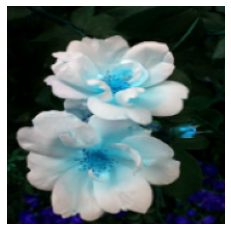

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
data_augmentation1=keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
])

In [42]:
data_augmentation1(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[47, 63, 60],
        [47, 63, 60],
        [47, 64, 61],
        ...,
        [55, 74, 68],
        [55, 75, 68],
        [55, 75, 69]],

       [[50, 66, 63],
        [50, 66, 63],
        [50, 65, 63],
        ...,
        [54, 72, 68],
        [55, 73, 69],
        [55, 74, 70]],

       [[51, 65, 62],
        [51, 65, 62],
        [51, 64, 62],
        ...,
        [54, 72, 68],
        [54, 73, 68],
        [55, 74, 69]],

       ...,

       [[51, 66, 64],
        [51, 65, 63],
        [51, 65, 62],
        ...,
        [49, 63, 60],
        [48, 61, 59],
        [47, 59, 58]],

       [[53, 68, 67],
        [52, 67, 65],
        [52, 65, 63],
        ...,
        [48, 62, 59],
        [47, 61, 58],
        [47, 60, 58]],

       [[51, 65, 65],
        [53, 66, 66],
        [54, 67, 66],
        ...,
        [47, 62, 59],
        [48, 61, 59],
        [48, 61, 59]]], dtype=uint8)>

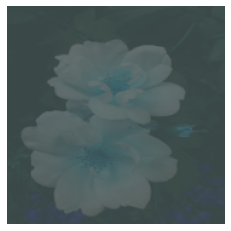

In [43]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype("uint8"))

In [44]:
#contrast Put simply, contrast is the scale of difference between black and white in your photos. It is the differing tones of black, grey and white; without which there wouldn't be any differentiation between light and dark.

In [45]:
data_augmentation2=keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9),
])

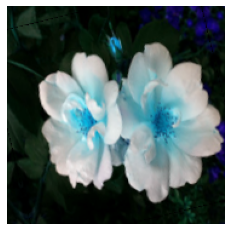

In [46]:
plt.axis('off')
plt.imshow(data_augmentation2(X)[0].numpy().astype("uint8"))

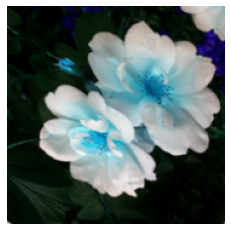

In [47]:
plt.axis('off')
plt.imshow(data_augmentation2(X)[0].numpy().astype("uint8"))

In [48]:
#it is rotating by different angle each time


In [49]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 ),
    
  ]
)

In [50]:
data_augmentation3= keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [51]:
num_classes = 5

model = Sequential([
  data_augmentation3,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 69s 800ms/step - loss: 1.5052 - accuracy: 0.3547
Epoch 2/30
86/86 [==============================] - 69s 805ms/step - loss: 1.1591 - accuracy: 0.5109
Epoch 3/30
86/86 [==============================] - 68s 791ms/step - loss: 1.0205 - accuracy: 0.6021
Epoch 4/30
86/86 [==============================] - 68s 791ms/step - loss: 0.9455 - accuracy: 0.6214
Epoch 5/30
86/86 [==============================] - 68s 786ms/step - loss: 0.8558 - accuracy: 0.6715
Epoch 6/30
86/86 [==============================] - 68s 792ms/step - loss: 0.8103 - accuracy: 0.6722
Epoch 7/30
86/86 [==============================] - 68s 795ms/step - loss: 0.7718 - accuracy: 0.6959
Epoch 8/30
86/86 [==============================] - 69s 797ms/step - loss: 0.7282 - accuracy: 0.7195
Epoch 9/30
86/86 [==============================] - 68s 791ms/step - loss: 0.6961 - accuracy: 0.7340
Epoch 10/30
86/86 [==============================] - 68s 788ms/step - loss: 0.6681 - accura

In [87]:
img

AttributeError: 'numpy.ndarray' object has no attribute 'height'

In [52]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 158ms/step - loss: 0.8382 - accuracy: 0.7298


[0.8382349014282227, 0.7298474907875061]

In [53]:
#without augmentation with augmentation accuracy
0.6633986830711365,0.7298474907875061

(0.6633986830711365, 0.7298474907875061)